In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [3]:
train = pd.read_csv('Datasets/train.csv')
train.shape

(891, 12)

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
# Checking for Missing Data
NAs = pd.concat([train.isnull().sum()], axis=1, keys=['train'])
NAs[NAs.sum(axis=1) > 0 ]

,train
Age,177
Cabin,687
Embarked,2


In [11]:
# Filling missing age values with mean
train['Age'] = train['Age'].fillna(train['Age'].mean())

In [13]:
# Filling missing Embarked values with Most Common Value
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])

In [14]:
# Filling missing Cabin values with Most Common Value
train['Cabin'] = train['Cabin'].fillna(train['Cabin'].mode()[0])

In [15]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [16]:
train['Pclass'] = train['Pclass'].apply(str)

In [17]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass          object
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [18]:
train.dtypes[train.dtypes == 'object'].index

Index(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [19]:
# Getting Dummies from all other Cateogical Vars
for col in train.dtypes[train.dtypes == 'object'].index:
    for_dummy = train.pop(col)
    train = pd.concat([train, pd.get_dummies(for_dummy, prefix=col)], axis=1)
train.head()    

,PassengerId,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,"Name_Abbing, Mr. Anthony",...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,1,0,22.0,1,0,7.2500,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,38.0,1,0,71.2833,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,1,26.0,0,0,7.9250,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,4,1,35.0,1,0,53.1000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0,35.0,0,0,8.0500,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [20]:
labels = train.pop('Survived')

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, labels, test_size=0.25)

In [22]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [23]:
y_pred = rf.predict(X_test)

In [24]:
from sklearn.metrics import roc_curve, auc
false_pos_rate, true_pos_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_pos_rate, true_pos_rate)
roc_auc

0.8234939759036145

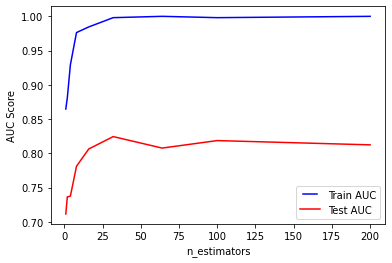

In [25]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []

for estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    false_pos_rate, true_pos_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_pos_rate, true_pos_rate)
    train_results.append(roc_auc)
    y_pred = rf.predict(X_test)
    false_pos_rate, true_pos_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_pos_rate, true_pos_rate)
    test_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(n_estimators, train_results, "b", label="Train AUC")
line2, = plt.plot(n_estimators, test_results, "r", label="Test AUC")
plt.legend(handler_map = {line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC Score")
plt.xlabel("n_estimators")
plt.show()